<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-исходных-данных" data-toc-modified-id="Загрузка-и-подготовка-исходных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка исходных данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-файла-и-предобработка" data-toc-modified-id="Загрузка-файла-и-предобработка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка файла и предобработка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-видов-объектов" data-toc-modified-id="Количество-видов-объектов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество видов объектов</a></span></li><li><span><a href="#Сетевые-и-несетевые-кафе" data-toc-modified-id="Сетевые-и-несетевые-кафе-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сетевые и несетевые кафе</a></span></li><li><span><a href="#Сетевое-распределение" data-toc-modified-id="Сетевое-распределение-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сетевое распределение</a></span></li><li><span><a href="#Среднее-количество-посадочных-мест" data-toc-modified-id="Среднее-количество-посадочных-мест-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Среднее количество посадочных мест</a></span></li><li><span><a href="#Анализ-ресторанов-на-улицах" data-toc-modified-id="Анализ-ресторанов-на-улицах-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ ресторанов на улицах</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Рынок заведений общественного питания Москвы

**Цель проекта:** исследование рынка общественного питания в Москве для прогноза популярности кафе, где обслуживать гостей будут роботы.

**Исходные данные:** открытые данные о заведениях общественного питания в Москве и данные о районах и улицах Москвы.

## Загрузка и подготовка исходных данных

### Описание данных

Таблица `rest_data`: 
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

Таблица `moscow_streets`:
* streetname - название улицы
* areaid - ID района	
* okrug	- название округа
* area - район

### Загрузка файла и предобработка

Импортируем необходимые для работы библиотеки:

In [1]:
from io import BytesIO
import requests
import pandas as pd
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

Пропишем путь к исходным файлам, которые нам понадобятся в проекте:

In [2]:
#пропишем путь к файлу с районами Москвы
spreadsheet_id = '1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [3]:
#пропишем путь к файлу с данными о ресторанах
try:
    data = pd.read_csv('D:/_THIS IS MY FOLDER/Я.Практикум, аналитика/Проекты/rest_data.csv')
except:
    data = pd.read_csv('/datasets/rest_data.csv')

data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В данных нет проблем с заголовками столбцов: они указаны в соответствии с хорошим стилем.

In [4]:
#review data info
def data_info(df):
    print(f'Размер таблицы {df.shape}')
    
    df.info()

    print(f'Количество дубликатов {df.duplicated().sum()}')


In [5]:
data_info(data)

Размер таблицы (15366, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
Количество дубликатов 0


В данных нет пропусков, а тип данных в каждом из столбцов соответствует нужному.

In [6]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Неявных дубликатов в столбце `object_type` нет

Узнаем, сколько уникальных названий кафе есть в датафрейме

In [7]:
unique_caffes_before = data['object_name'].nunique()
print('В дата фрейме', data['object_name'].nunique(), 'уникальных названий кафе')

В дата фрейме 10393 уникальных названий кафе


In [8]:
#выведем на экран все названия кафе
names_of_rest = (
    data['object_name'].unique()
)    
list_names_of_rest = names_of_rest.tolist()
list_names_of_rest.sort()

for name in list_names_of_rest:
    print(name)

1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС
1-й МОК
100 личная столовая
100 личное кафе
1001 ночь
100лоФФка
101 вкус
13 RULES
13 RULES KRAFT BEER
13 Rules
15 Kitchen+bar
18 АВТОБУСНЫЙ ПАРК
19bar Atmosphere
1x bet
2-Й АВТОБУСНЫЙ ПАРК
23'00
24 Градуса
259
3 Skovorodki
3 правила
33 пингвина
37-37
44 Чашма
495
5звезд Юг 52
68. ПАУЗА
69 Pints Бар
69 pints
7 Сендвичей
7 злаков
7 сэндвичей-Meating
7717 LOUNGE (Кальянная)
8 OZ Унций
8-ОЙ ТРОЛЛЕЙБУСНЫЙ ПАРК
9 АВТОБУСНЫЙ ПАРК
9bar
ABC Coffee Roasters
ACCENTI
ADRY
AGLOMERAT
AL33 Пиццерия Бар Ботега
ALOHA POKE BAR
AMARSI
AMG
APARTAMENT Пар Бар
AQKitchen
ART PUB
Abbey Players Irish Pub
Absolem
Acai Family
Alex Пекарня
Amande Cafe
Americano Кафе
Amerigos Pizza
Amore Grande
Amore, итальянское мороженое
Amster bar snacks
An Nam
Andiamo
Andy's friends
Arahis Pub
Arbat hall
Arena by Soho Family
Aroma
Art Cafe
Art lunch
Art&Food
Avenue 6
BARBADOS
BARRIQUE
BAZAR
BB & Burgers
BB Grill
BB энд Burger
BB&BURGERS
BB&Burgers
BBBurgers
BBQ
BBQ AM Барбекю
BEER BEER bar
BEER

В данных очень много неявных дубликатов.

In [9]:
warnings.filterwarnings("ignore")

In [10]:
#приведем буквы в названиях к нижнему регистру
data['object_name'] = data['object_name'].str.lower()

#избавимся от кавычек, запятых и точек в данных столбца object_name
data['object_name'] = data['object_name'].str.replace('[«»,.]','')

In [11]:
#напишем функцию correct_name, которая  присваивает нужное нам название кафе в зависимости от дубликатов
def correct_name(row):
    if ('додопицца' or 'пицца додо' or 'пиццерия додо' or 'пиццерия додо пицца' or
         'предприятие быстрого обслуживания додо пицца') in row:
        return 'додо пицца'
    if ('закусочная крошка картошка' or 'кафе крошка картошка' or
        'кафе крошка-картошка' or 'крошка картошка' or 'крошка крем' or
        'крошка-картошка' or 'крошкакартошка' or 'предприятие быстрого обслуживания крошка картошка' or
        "предприятие быстрого питания крошка картошка" or "ресторан быстрого питания крошка картошка") in row:
        return 'крошка картошка'
    if ('братья караваевы' or 'братья караваевых' or 'кафе кулинарная лавка братьев караваевых' or
        'кулинарная лавка братьев караваевых братья караваевы') in row:
        return 'кулинарная лавка братьев караваевых'
    if ('kfc' or 'кфс') in row:
        return 'kfc'
    if ('старбагс' or 'старбакс' or 'старбакс starbucks' or 'старбакс кофе' or 'кофемания starbucks' or
        'кафе starbucks' or 'starbucks coffee' or 'starbucks кофе' or 'starbucks старбакс' or
        'starbucks старбакс кофе') in row:
        return 'starbucks'
    if ('бургер кинг' or 'burgerking') in row:
        return 'бургер кинг'
    if ('бар мята lounge' or 'кальян- бар мята lounge' or 'кальян-бар мята lounge' or
        'кальянная мята launge' or 'кальянная мята lounge' or 'кафе мята' or 
        'кафе мята lounge кальянный клуб' or 'лаундж-бар мята lounge' or 'мята' or
        'мята lounge автозаводская' or 'мята lounge октябрьская' or 'мята lounge шаболовка' or
        'мята кальянная' or 'мята лаунж' or 'мята университет') in row:
        return 'мята lounge'
    if 'макдоналдс' in row:
        return 'mcdonalds'
    if 'теремок' in row:
        return 'теремок'
    if 'шоколадница' in row:
        return 'шоколадница'
    if ("домино'с" or 'доминос' or 'domino-s' or 'dominos') in row:
        return "domino's pizza"
    else:
        return row

#проверим работоспособность функции
correct_name('ресторан бар kfc star too')

'kfc'

Функция работает корректно

In [12]:
#применяем функцию к столбцу object_name
data['object_name'] = data['object_name'].apply(correct_name)

In [13]:
unique_caffes_after = data['object_name'].nunique()

In [14]:
print(f'Нам удалось избавиться от {(1 - unique_caffes_after / unique_caffes_before):.1%} дубликатов')

Нам удалось избавиться от 5.9% дубликатов


### Вывод

* В данных правильно прописаны заголовки столбцов
* В данных нет явных дубликатов и пропусков
* Типы данных верные
* В данных очень много неявных дубликатов. Примем наличие таких шумов как данность и оставим как есть.

## Анализ данных

### Количество видов объектов

Сгруппируем исходный датафрейм по типу объекта и посчитаем сумму количества заведений для каждого из типов объектов

In [15]:
amount_of_objects = (
    data.groupby('object_type', as_index=False)['id'].count()
    .sort_values(by='id')
)

In [16]:
trace = go.Bar(
    x = amount_of_objects.object_type,
    y = amount_of_objects.id
)
layout = go.Layout(
    title='Количество видов объектов',
)

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

В Москве больше всего кафе. Меньше всего в Москве магазинов в отделе кулинарии, где можно перекусить

### Сетевые и несетевые кафе

Сгруппируем исходные данные по столбцу 'chain' и посчитаем количество кафе в каждой из категорий.

In [17]:
amount_of_chain_rest = data.groupby('chain', as_index=False)['id'].count()
amount_of_chain_rest['chain'] = amount_of_chain_rest['chain'].str.replace('да', 'Сетевое кафе')
amount_of_chain_rest['chain'] = amount_of_chain_rest['chain'].str.replace('нет', 'Несетевое кафе')

In [18]:
import plotly.express as px
fig = px.pie(amount_of_chain_rest, values='id', names='chain')
fig.show()

In [19]:
fig = px.pie(amount_of_chain_rest, 
             values = 'id', 
             names = 'chain', 
             title="Количество сетевых и несетвых кафе")
fig.show()

В Москве количество несетевых ресторанов в 4 раза больше, чем количество сетевых ресторанов.

### Сетевое распределение

Расчитаем долю заведений, относящихся к сетевым ресторанам.

In [20]:
#посчитаем количество сетевых и несетевых объектов общественного питания раного типа
amount_chain_rest = data.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count').reset_index()
#посчитаем общее количество объектов общественного питания разного типа
common_amount_rest = data.pivot_table(index = 'object_type', values = 'id', aggfunc = 'count').reset_index()
#соединим 2 таблицы
amount_of_rest = amount_chain_rest.merge(common_amount_rest, on = 'object_type', how = 'left')

#найдем отношение сетевых ресторанов к общему количеству ресторанов
amount_of_rest['ratio'] = amount_of_rest['да']/amount_of_rest['id']

(
    amount_of_rest.rename(columns = {'да': 'sum_chain', 'нет': 'sum_not_chain', 'id': 'sum'})
    
    .sort_values(by = 'ratio', ascending = False)
    .style.format({'ratio': '{:.2%}'})
    .hide_index()
    
)


object_type,sum_chain,sum_not_chain,sum,ratio
предприятие быстрого обслуживания,791,1132,1923,41.13%
магазин (отдел кулинарии),78,195,273,28.57%
ресторан,544,1741,2285,23.81%
кафе,1396,4703,6099,22.89%
закусочная,56,304,360,15.56%
кафетерий,52,346,398,13.07%
бар,37,819,856,4.32%
буфет,11,574,585,1.88%
столовая,3,2584,2587,0.12%


Больше всего сетевых предприятий быстрого обслуживания, меньше всего сетевых столовых.

Выделим из общего набора данных места приема пищи только сетевые

In [21]:
chain_rest = data.query('chain == "да"')

In [22]:
#сгруппируем сетевые рестораны по их виду и посчитаем количество каждого вида 
#и среднее число посадочных мест
chain_rest_grouped = (
    chain_rest.groupby('object_type', as_index=False).agg({'id': 'count', 
                                                           'number': 'mean'})
    .sort_values(by='id', ascending = False)
    
)
chain_rest_grouped['number'] = chain_rest_grouped['number'].apply(lambda x: round(x, 0))
chain_rest_grouped.columns = ['object_type', 'amount', 'mean_number_of_seats']
chain_rest_grouped

,object_type,amount,mean_number_of_seats
3,кафе,1396,47.0
6,предприятие быстрого обслуживания,791,40.0
7,ресторан,544,100.0
5,магазин (отдел кулинарии),78,9.0
2,закусочная,56,14.0
4,кафетерий,52,12.0
0,бар,37,53.0
1,буфет,11,13.0
8,столовая,3,112.0


Среди сетевых ресторанов больше всего кафе.


Узнаем названия самых популярных сетей кафе

In [23]:
cafe = chain_rest[chain_rest['object_type'] == 'кафе']
top_cafe = cafe.groupby('object_name', as_index= False)['id'].count()
top_cafe_10 = top_cafe.sort_values(by='id',ascending=False).head(10)
top_cafe_10

,object_name,id
315,шоколадница,178
10,domino's pizza,56
92,додо пицца,37
279,суши wok,35
301,хинкальная,33
171,кофе хаус,32
16,kfc,31
290,теремок,30
305,хлеб насущный,30
65,бургер кинг,26


Судя по всему, людям больше всего нравится наличие разнообразных блюд в меню, как в Шоколаднице, и пицца.

In [25]:
chain_rest['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Максимальное число посадочных мест в сетевых ресторанах 580. Миниальное количество посадочных мест 0. 50% сетевых ресторанов имеют 40 и меньше посадочных мест.<br>
Построим для наглядности график распределения.

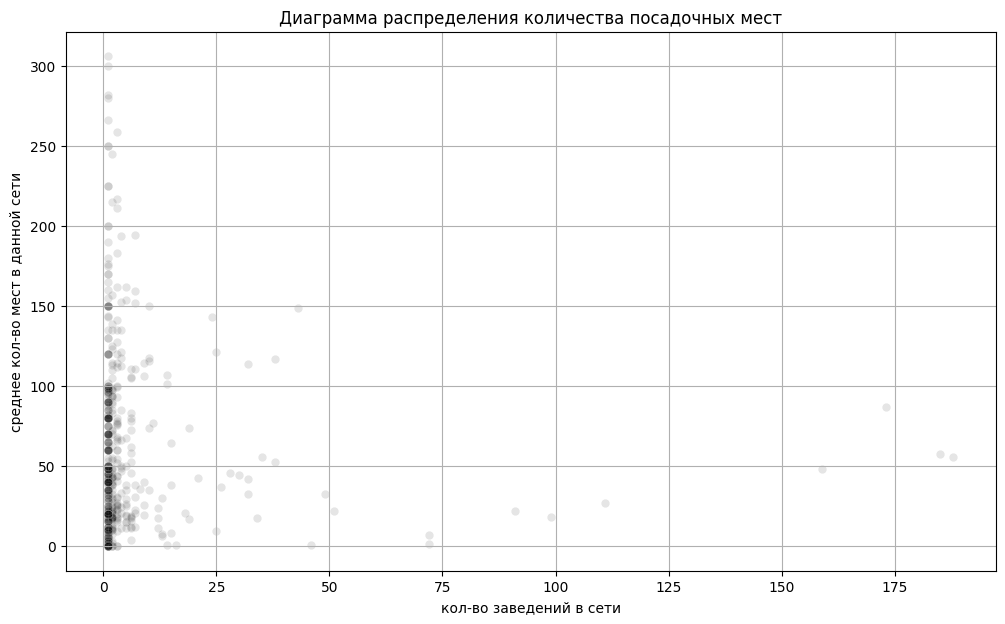

In [27]:
chain_rest_grouped2 = (
    chain_rest
    .groupby('object_name')
    .agg(est_count=('id', 'count'), seats_num=('number', 'mean'))
)

plt.figure(figsize=(12, 7))

ax = sns.scatterplot(
    data=chain_rest_grouped2, 
    x="est_count", 
    y="seats_num",
    color = 'black',
    alpha=0.1
)

plt.title("Диаграмма распределения количества посадочных мест")
ax.set(xlabel='кол-во заведений в сети', ylabel='среднее кол-во мест в данной сети')
plt.grid()

plt.show()

Для сетевых заведений характерно большое количество заведений без посадочных мест либо с очень малым количеством посадочных мест. В то же время число заведений с большим числом посадочных мест (от 100 и выше) крайне мало

### Среднее количество посадочных мест

Посмотрим, сколько в среднем посадочных мест для каждого вида объекта общественного питания.

In [28]:
#создадим сводную таблицу, сгруппировав данные по типу заведения и для каждого из них
#выделив отдельно, является ли заведение сетевым
#для каждого из типов заведений посчитаем среднее количество посадочных мест
rest_grouped_by_type = data.pivot_table(index=['object_type', 'chain'], values='number', aggfunc='mean')
#добавим индексы
rest_grouped_by_type = rest_grouped_by_type.reset_index()
#округлим полученные значения среднего количества посадочных мест
rest_grouped_by_type['number'] = round(rest_grouped_by_type['number'], 2)

Построим график по сводной таблице.

In [29]:
fig = px.bar(
    rest_grouped_by_type,
    x='object_type',
    y='number',
    color='chain',
    title='Количество посадочных мест для каждого из заведений',
    labels={
                     "object_type": "Тип заведения",
                     "number": "Количество"
             }
)
fig.update_xaxes(tickangle=45)
fig.show() 


Самое большое количество посадочных мест у столовых. Меньше всего посадочных мест в отделе кульнарии в магазинах. Такое распределение касается как сетевых, так и несетевых ресторанов.

### Анализ ресторанов на улицах

Для начала оставим только те строки, где в колонке "Адрес" есть информация о городе. Примем во внимание, что в таких строчках адреса указаны некорректно, потому что мы не знаем, к какому городу относится адрес.

In [30]:
data = data[data['address'].str.contains('город')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15299 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15299 non-null  int64 
 1   object_name  15299 non-null  object
 2   chain        15299 non-null  object
 3   object_type  15299 non-null  object
 4   address      15299 non-null  object
 5   number       15299 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 836.7+ KB


Мы отбросили не более 1% данных. Всё в рамках допустимого.

In [31]:
#напишем функцию, в которую будем передавать значение из столбца 'address'
#и разделять значение в ячейке по ", "
#на выходе из функции будет получаться объект типа 'list', нам нужно только второе по счету
#значение из list, т.е. только лишь улица
def select_street(row):
    street = row['address'].split(', ')
    return street[1]
#применим функцию к исходному датафрейму
data['street'] = data.apply(select_street, axis=1)

In [32]:
#сгруппируем данные по названиям улиц и посчитаем количество кафе на каждой из улиц
street_grouped = data.groupby('street', as_index=False)['id'].count()
#отсортируем данные по убыванию
street_grouped  = street_grouped.sort_values(by='id', ascending=False)
#сделаем сортировку от 1, т.к. если сделаем от 0, то в датафрейм войдет г Зеленоград, а он не является улицей
top_streets = street_grouped[1:12]
top_streets

,street,id
1404,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1371,поселение Сосенское,138
1401,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112


поселение Сосенское - не улица. Избавимся от строки с этим значением.

In [33]:
top_streets = top_streets[top_streets.street != 'поселение Сосенское']
top_streets

,street,id
1404,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1401,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112
605,Кировоградская улица,110


In [34]:
fig = px.bar(top_streets,
             x='street', 
             y='id', 
             title='Топ 10 улиц по количеству объектов общественного питания',
            labels={
                     "street": "Улица",
                     "id": "Количество объектов общесвтенного питания"
             })
fig.update_xaxes(tickangle=45)
fig.show()

Районы Москвы, в которых находятся топовые улицы:<br>
* проспект Мира  - Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино          
* Профсоюзная улица  - Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево      
* Ленинградский проспект - Беговой, Аэропорт, Сокол, Хорошёвский
* Пресненская набережная - Пресненский район    
* Варшавское шоссе  - Северное Бутово, Южное Бутово, Донской, Нагатино-Садовники, Нагорный, Северное Чертаново, Центральное Чертаново и Южное Чертаново       
* Ленинский проспект   - Гагаринский, Донской     
* проспект Вернадского - Внуково, Дорогомилово, Крылатское, Кунцево, Можайский, Ново-Переделкино, Очаково-Матвеевское, Проспект Вернадского, Раменки, Солнцево, Тропарёво-Никулино, Филёвский парк и Фили-Давыдково.   
* Кутузовский проспект - Дорогомилово и Фили-Давыдково.     
* Каширское шоссе - Москворечье-Сабурово, Нагатино-Садовники, Северное Орехово-Борисово и Южное Орехово-Борисово 
* Кировоградская улица - Чертаново Северное, Чертаново Центральное и Чертаново Южное.

Найдем названия улиц с одним рестораном.

In [35]:
streets_with_one_rest = street_grouped.query('id == 1')
streets_with_one_rest.columns=['streetname', 'amount']
streets_with_one_rest

,streetname,amount
28,1-й Монетчиковский переулок,1
1682,улица Можайский Вал,1
1822,улица Фонвизина,1
1817,улица Уткина,1
1819,улица Фадеева,1
...,...,...
530,Живарев переулок,1
529,Есенинский бульвар,1
1316,Ясногорская улица,1
524,Елоховский проезд,1


542 улицы содержат по 1 заведению общественного питания.

In [36]:
#объединим таблицу с информацией об улицах с 1 заведением и данные о улицах и районах москвы
streets_with_one_rest_area = streets_with_one_rest.merge(moscow_streets[['streetname','area']], 
                                on='streetname', 
                                how='left')

In [37]:
(
   streets_with_one_rest_area.groupby('area')['streetname'].count()
    .sort_values()
    .tail(10)
)

area
Район Замоскворечье    14
Район Сокольники       15
Мещанский район        16
Район Арбат            17
Район Марьина роща     18
Пресненский район      19
Тверской район         20
Басманный район        25
Район Хамовники        26
Таганский район        27
Name: streetname, dtype: int64

В выведенных районах больше всего улиц с одним заведением. Это может быть обусловлено большой стоимостью аренды или покупки площади, а также тем, что это исторический район и здесь сложнее получить разрешение на открытие ресторана.

## Вывод

* Открыть несетевой ресторан (т.к. кафе очень много по городу, большая конкуренция; несетевой - т.к. оригинальное заведение)
* Количество посадочных мест около 50 (т.к. а)роботы дорогие. при большом количестве людей нужно больше инвестиций в обслуживающий "персонал" б) попробовать открыться в центре, а там дороже площади)
* Район Таганский, т.к. в нем судя по всему только 27 мест приема пищи. Низка конкуренция. При этом, это очень проходной и красивый район Москвы.
* Сеть стоит развить только в том случае, если владельцы поймут, что гостям приятно, когда их обслуживает робот. Если заведение начнет набирать популярность, то можно открыть сеть. Открывать сетевые рестораны пытаться в тех же районах, где мало ресторанов, т.к. чем меньше у людей выбора, тем больше вероятность, ято они выберут наш ресторан.

Презентация: https://disk.yandex.ru/i/6Qpv5Q8wo4pL4Q